In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MultipleLocator
from scipy.stats.stats import pearsonr
from pandas import DataFrame

path = '/Users/emilysf098/Desktop/Research/SN-Spectral-Evolution'

# Making Pearson Tables

In [20]:
sdss_pearson = pd.read_csv(path + '/results/sdss_combined.csv')
features = [f'pW{i}' for i in range(1, 9)]
from scipy.stats.stats import pearsonr

CIDs = list(set(sdss_pearson['obj_id']))
feats = ['pW1', 'pW2', 'pW3', 'pW4', 'pW5', 'pW6', 'pW7']

In [21]:
def pearson_val(xcol, ycol):
    """Creates lists of pearson statistic p and c values for each feature for any two given columns
        used in pearson_table_make function
    
    Args:
        df     (DataFrame): The dataframe in which the columns we want to compare are
        features (List[str]): The feature ids to add to table
        xcol           (str): Name of one column to compare (pEW or vel)
        ycol           (str): Name of second column to compare (pEW or vel)
    
    Returns:
        p_list   (List[float]): List of P values
        c_list   (List[float]): List of c values
    """
    
    if len(xcol) >= 3:
        corr, p = pearsonr(xcol, ycol)
        p_val = p
        c_val = corr
            
    else:
        p_val = np.nan
        c_val = np.nan
        
    return p_val, c_val
        

In [22]:
def two_feat_table2(feat1, feat2, data):
    valid_obj = []
    for cid in CIDs:
        df = data[data['obj_id'] == cid]
        if feat1 in list(df['feat_name']) and feat2 in list(df['feat_name']):
            valid_obj.append(cid)
        else:
            pass
    indexed_df = data.set_index('obj_id')
    new_df = indexed_df.loc[valid_obj, :]
    return new_df[new_df['feat_name'] == feat1] , new_df[new_df['feat_name'] == feat2]

In [23]:
def pearson_table_make(df, features, qual):
    """Creates data frame of p and c pearson stat values for specific columns vs. pew and vel
    
    Args:
        df     (DataFrame): The dataframe in which the columns we want to compare are
        features (List[str]): The feature ids to add to table 
        qual     (str): string either pew or vel
        
    Returns:
        data    (DataFrame): Table of p and c values for different qualities vs pew and vel.
    """
        
    data = pd.DataFrame()
    data['features'] = features
    
    for feat1 in features:
       # feat_df1 = df[df['feat_name'] == feat1]
        feat_1_p = []
        feat_1_c = []
        
        for feat2 in features:
          #  feat_df2 = df[df['feat_name'] == feat2]
            
            valid_obj = []
            
            feat_df1, feat_df2 = two_feat_table2(feat1, feat2, df)
            
            feat_df1 = feat_df1.reset_index()
            feat_df2 = feat_df2.reset_index()
            
            
            col1 = feat_df1[qual]
            col2 = feat_df2[qual]

            nans1 = np.isnan(col1)
            nans2 = np.isnan(col2)
            
            is_nan = np.logical_not(np.logical_or(nans1,nans2))
            
            col1 = col1[is_nan]
            col2 = col2[is_nan]
            
            p_val, c_val = pearson_val(list(col1), list(col2))
            feat_1_p.append(p_val)
            feat_1_c.append(c_val)
         
        data[f'{feat1}_c_{qual}'] = feat_1_c
        data[f'{feat1}_p_{qual}'] = feat_1_p
    
    data = data.set_index('features')

    return data

In [24]:
vel_comparison = pearson_table_make(sdss_pearson, features, 'vel')
vel_comparison.to_csv(path + '/results/vel_pearson_comparison.csv')
vel_comparison

,pW1_c_vel,pW1_p_vel,pW2_c_vel,pW2_p_vel,pW3_c_vel,pW3_p_vel,pW4_c_vel,pW4_p_vel,pW5_c_vel,pW5_p_vel,pW6_c_vel,pW6_p_vel,pW7_c_vel,pW7_p_vel,pW8_c_vel,pW8_p_vel
features,,,,,,,,,,,,,,,,
pW1,1.000000,0.000000,0.178367,1.003609e-01,0.300869,1.266773e-03,0.338087,4.197353e-04,0.249356,1.428543e-02,0.003963,0.971457,0.278635,9.382206e-03,NaN,NaN
pW2,0.178367,0.100361,1.000000,0.000000e+00,0.514196,9.826132e-08,0.356056,6.159414e-04,0.400572,1.325206e-04,0.286105,0.011653,0.609380,1.990438e-09,NaN,NaN
pW3,0.300869,0.001267,0.514196,9.826132e-08,1.000000,0.000000e+00,0.219601,1.641102e-02,0.487373,7.677899e-08,-0.015474,0.881055,0.368110,1.777875e-04,0.751169,0.458981
pW4,0.338087,0.000420,0.356056,6.159414e-04,0.219601,1.641102e-02,1.000000,0.000000e+00,0.230695,1.735154e-02,0.213592,0.039808,0.487613,4.686202e-07,NaN,NaN
pW5,0.249356,0.014285,0.400572,1.325206e-04,0.487373,7.677899e-08,0.230695,1.735154e-02,1.000000,0.000000e+00,0.082896,0.429546,0.454137,3.791004e-06,0.625168,0.570061
pW6,0.003963,0.971457,0.286105,1.165349e-02,-0.015474,8.810548e-01,0.213592,3.980829e-02,0.082896,4.295456e-01,1.000000,0.000000,0.317917,2.693575e-03,0.336043,0.781822
pW7,0.278635,0.009382,0.609380,1.990438e-09,0.368110,1.777875e-04,0.487613,4.686202e-07,0.454137,3.791004e-06,0.317917,0.002694,1.000000,0.000000e+00,0.730247,0.478810
pW8,NaN,NaN,NaN,NaN,0.751169,4.589806e-01,NaN,NaN,0.625168,5.700612e-01,0.336043,0.781822,0.730247,4.788099e-01,1.000000,0.000000


In [25]:
pew_comparison = pearson_table_make(sdss_pearson, features, 'pew')
pew_comparison.to_csv(path + '/results/pew_pearson_comparison.csv')
pew_comparison

,pW1_c_pew,pW1_p_pew,pW2_c_pew,pW2_p_pew,pW3_c_pew,pW3_p_pew,pW4_c_pew,pW4_p_pew,pW5_c_pew,pW5_p_pew,pW6_c_pew,pW6_p_pew,pW7_c_pew,pW7_p_pew,pW8_c_pew,pW8_p_pew
features,,,,,,,,,,,,,,,,
pW1,1.000000,0.000000,0.226784,1.772144e-02,0.298746,1.243767e-03,0.299942,1.696487e-03,0.289843,3.281962e-03,0.134320,1.968033e-01,0.338061,1.275873e-03,NaN,NaN
pW2,0.226784,0.017721,1.000000,0.000000e+00,0.392986,1.072958e-05,0.633236,8.815394e-14,0.333754,4.717998e-04,0.482519,4.244932e-07,0.625309,2.678319e-11,0.426697,0.719354
pW3,0.298746,0.001244,0.392986,1.072958e-05,1.000000,0.000000e+00,0.634684,7.036780e-15,0.585424,1.207484e-11,0.523252,1.023355e-08,0.606919,2.755251e-11,-0.586617,0.600919
pW4,0.299942,0.001696,0.633236,8.815394e-14,0.634684,7.036780e-15,1.000000,0.000000e+00,0.552665,3.850954e-10,0.581451,1.193413e-10,0.708146,4.986467e-16,0.722177,0.486283
pW5,0.289843,0.003282,0.333754,4.717998e-04,0.585424,1.207484e-11,0.552665,3.850954e-10,1.000000,0.000000e+00,0.405036,1.820256e-05,0.546833,5.696975e-09,0.981608,0.122285
pW6,0.134320,0.196803,0.482519,4.244932e-07,0.523252,1.023355e-08,0.581451,1.193413e-10,0.405036,1.820256e-05,1.000000,0.000000e+00,0.670336,1.470127e-13,-0.995779,0.058516
pW7,0.338061,0.001276,0.625309,2.678319e-11,0.606919,2.755251e-11,0.708146,4.986467e-16,0.546833,5.696975e-09,0.670336,1.470127e-13,1.000000,0.000000e+00,0.998364,0.036425
pW8,NaN,NaN,0.426697,7.193543e-01,-0.586617,6.009188e-01,0.722177,4.862835e-01,0.981608,1.222850e-01,-0.995779,5.851629e-02,0.998364,3.642466e-02,1.000000,0.000000


In [26]:
sdss_cl = sdss_pearson[sdss_pearson['branch_type'] == 'CL']
sdss_bl = sdss_pearson[sdss_pearson['branch_type'] == 'BL']
sdss_ss = sdss_pearson[sdss_pearson['branch_type'] == 'SS']
sdss_cn = sdss_pearson[sdss_pearson['branch_type'] == 'CN']

In [27]:
pew_comparison_cl = pearson_table_make(sdss_cl, features, 'pew')
pew_comparison_cl.to_csv(path + '/results/pew_pearson_comparison_cl.csv')

pew_comparison_bl = pearson_table_make(sdss_bl, features, 'pew')
pew_comparison_bl.to_csv(path + '/results/pew_pearson_comparison_bl.csv')

pew_comparison_ss = pearson_table_make(sdss_ss, features, 'pew')
pew_comparison_ss.to_csv(path + '/results/pew_pearson_comparison_ss.csv')

pew_comparison_cn = pearson_table_make(sdss_cn, features, 'pew')
pew_comparison_cn.to_csv(path + '/results/pew_pearson_comparison_cn.csv')

In [28]:
vel_comparison_cl = pearson_table_make(sdss_cl, features, 'vel')
vel_comparison_cl.to_csv(path + '/results/vel_pearson_comparison_cl.csv')

vel_comparison_bl = pearson_table_make(sdss_bl, features, 'vel')
vel_comparison_bl.to_csv(path + '/results/vel_pearson_comparison_bl.csv')

vel_comparison_ss = pearson_table_make(sdss_ss, features, 'vel')
vel_comparison_ss.to_csv(path + '/results/vel_pearson_comparison_ss.csv')

vel_comparison_cn = pearson_table_make(sdss_cn, features, 'vel')
vel_comparison_cn.to_csv(path + '/results/vel_pearson_comparison_cn.csv')

# Making Heatmaps

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame

path = '/Users/emilysf098/Desktop/Research/SN-Spectral-Evolution'
pew_pearson = pd.read_csv(path + '/results/pew_pearson_comparison.csv')
vel_pearson = pd.read_csv(path + '/results/vel_pearson_comparison.csv')

In [2]:
    feature_alias = {
        'pW1': 'Ca ii H&K',
        'pW2': 'Si ii λ4130',
        'pW3': 'Mg ii, Fe ii',
        'pW4': 'Fe ii, Si ii',
        'pW5': 'S ii λ5449, λ5622',
        'pW6': 'Si ii λ5972',
        'pW7': 'Si ii λ6355',
        'pW8': 'Ca ii IR triplet'}

In [3]:
features = [f'pW{i}' for i in range(1, 8)]

In [5]:
table = vel_pearson.iloc[:7,:]
table = table.set_index('features')
itable = table.iloc[:,:14]
ctable = itable[itable.columns[::2]]

In [6]:
def heat_map_entry(table):
    """Create arrays to enter into the plot_heat_map function
    Args:
        table     (DataFrame): The data to use
    Returns:
        carray_pew    (array): array of c values against pew
        parray_pew    (array): array of p values against pew
        carray_vel    (array): array of c values against vel
        parray_vel    (array): array of p values against vel
    """
 
    # keeps only features 1-7
    table = table.iloc[:7,:]
    # creates indexed table
    itable = table.set_index('features')
    # keeps properties we want to plot
    itable = itable.iloc[:,:14]

    # creates dfs of just c and p values 
    ctable = itable[itable.columns[::2]]
    ptable = itable[itable.columns[1::2]]
    
    
    #makes dfs into arrays
    carray = ctable.to_numpy()
    parray = ptable.to_numpy()

    return carray, parray

In [7]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    #ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("white", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [8]:
def plot_heat_map(carray, parray, against):
    """plots 2 heat maps for c and p value respectively
       host gal properties on vertical axis and features on horizontal
    Args:
        carray     (array): array of c values
        parray     (array): array of p values
        against    (string): pew or vel
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    # 1st plot


    im, _ = heatmap(carray, features, features, ax=ax1,
                cmap="Blues", cbarlabel=f"pearson correlation values for {against}")
    annotate_heatmap(im, valfmt="{x:.3f}", size=10, color=('black', 'white'), 
                     threshold=0.6, textcolors = ('black','white'))

    # 2nd plot

    im, _ = heatmap(parray, features, features, ax=ax2, vmin=0,
                cmap="Blues", cbarlabel=f"p values for {against}")
    annotate_heatmap(im, valfmt="{x:.3f}", size=10, threshold=0.11,
                 textcolors=("black", "white"))

    plt.tight_layout()
    plt.show()

In [9]:
carray_pew, parray_pew = heat_map_entry(pew_pearson)

## All Data

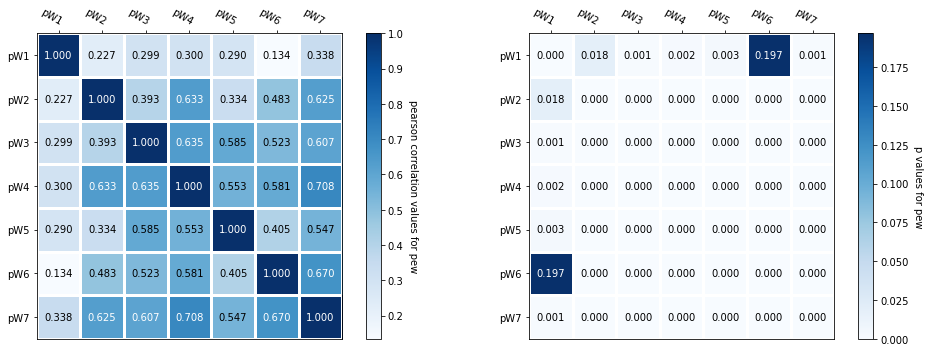

In [10]:
plot_heat_map(carray_pew, parray_pew, 'pew')

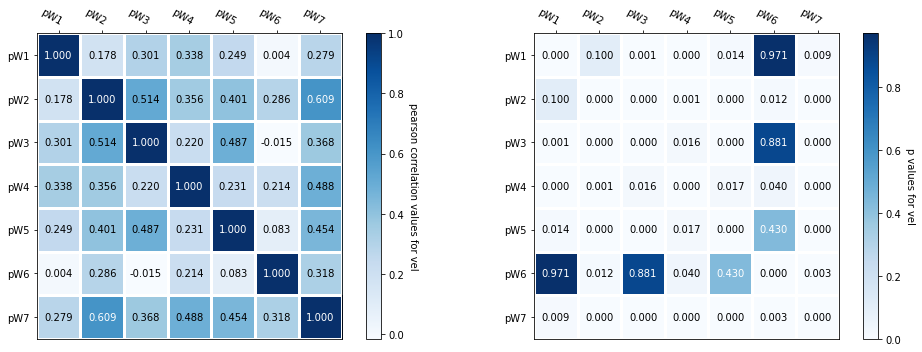

In [11]:
carray_vel, parray_vel = heat_map_entry(vel_pearson)
plot_heat_map(carray_vel, parray_vel, 'vel')

#put in 2 colors for negative trend

In [12]:
pew_pearson_cn = pd.read_csv(path + '/results/pew_pearson_comparison_cn.csv')
vel_pearson_cn = pd.read_csv(path + '/results/vel_pearson_comparison_cn.csv')

pew_pearson_ss = pd.read_csv(path + '/results/pew_pearson_comparison_ss.csv')
vel_pearson_ss = pd.read_csv(path + '/results/vel_pearson_comparison_ss.csv')

pew_pearson_cl = pd.read_csv(path + '/results/pew_pearson_comparison_cl.csv')
vel_pearson_cl = pd.read_csv(path + '/results/vel_pearson_comparison_cl.csv')

pew_pearson_bl = pd.read_csv(path + '/results/pew_pearson_comparison_bl.csv')
vel_pearson_bl = pd.read_csv(path + '/results/vel_pearson_comparison_bl.csv')

## CN Data

In [13]:
carray_pew_cn, parray_pew_cn = heat_map_entry(pew_pearson_cn)
carray_vel_cn, parray_vel_cn = heat_map_entry(vel_pearson_cn)

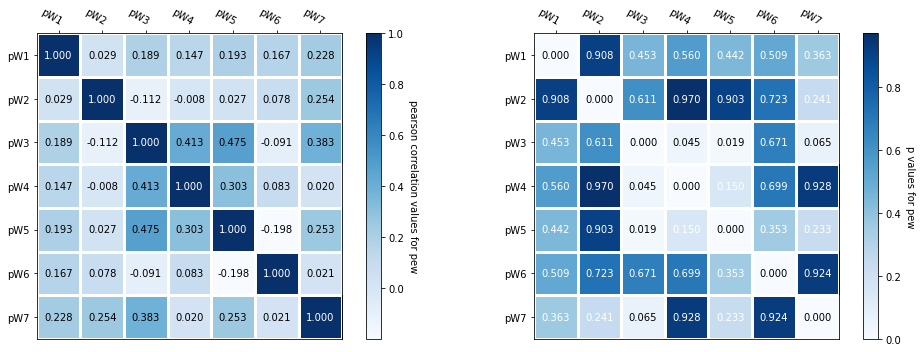

In [14]:
plot_heat_map(carray_pew_cn, parray_pew_cn, 'pew')

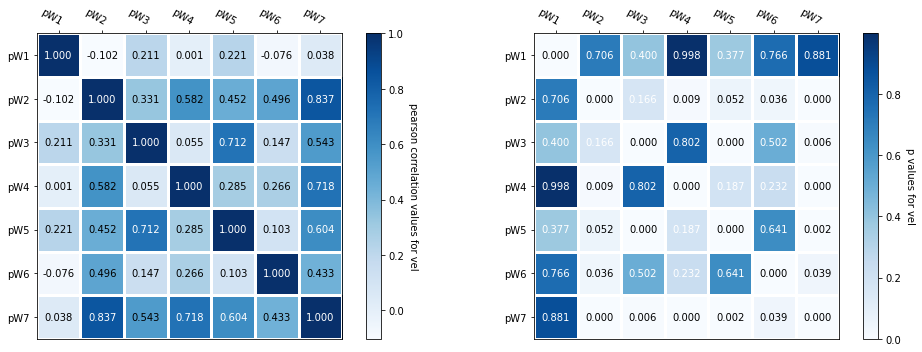

In [15]:
plot_heat_map(carray_vel_cn, parray_vel_cn, 'vel')

## SS Data

In [16]:
carray_pew_ss, parray_pew_ss = heat_map_entry(pew_pearson_ss)
carray_vel_ss, parray_vel_ss = heat_map_entry(vel_pearson_ss)

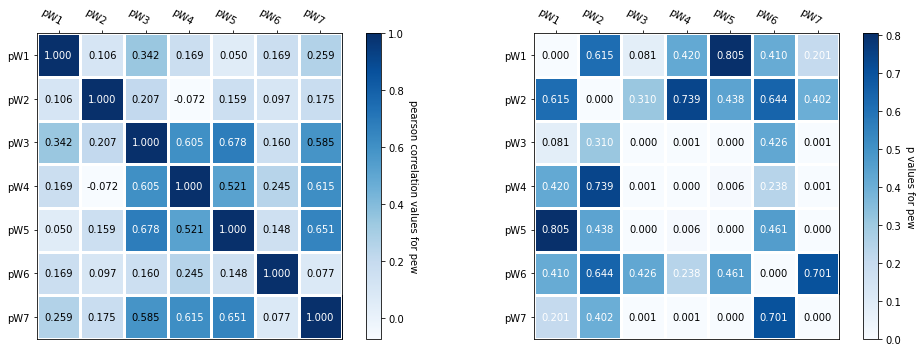

In [17]:
plot_heat_map(carray_pew_ss, parray_pew_ss, 'pew')

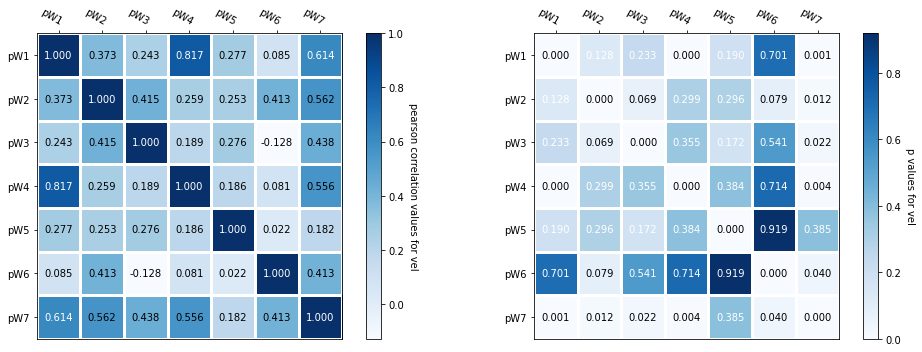

In [18]:
plot_heat_map(carray_vel_ss, parray_vel_ss, 'vel')

## CL Data

In [19]:
carray_pew_cl, parray_pew_cl = heat_map_entry(pew_pearson_cl)
carray_vel_cl, parray_vel_cl = heat_map_entry(vel_pearson_cl)

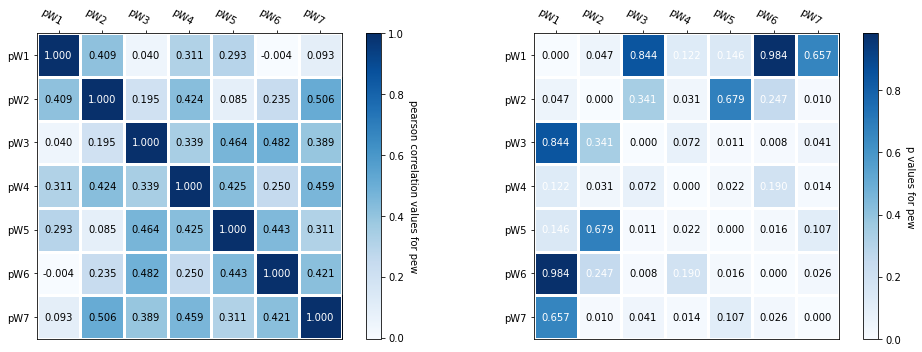

In [20]:
plot_heat_map(carray_pew_cl, parray_pew_cl, 'pew')

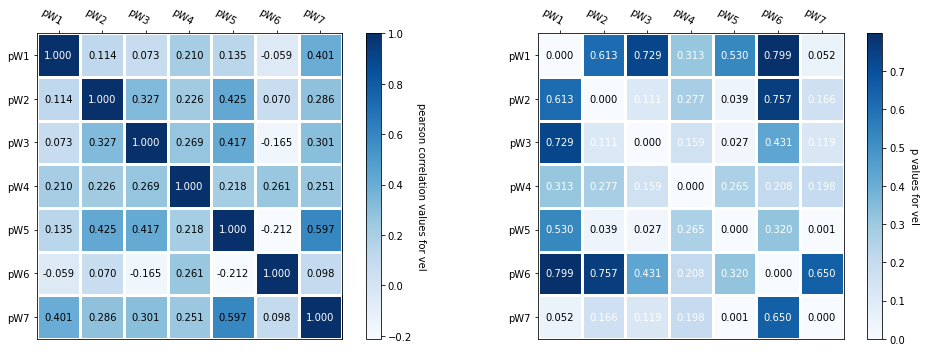

In [21]:
plot_heat_map(carray_vel_cl, parray_vel_cl, 'vel')

## BL Data

In [22]:
carray_pew_bl, parray_pew_bl = heat_map_entry(pew_pearson_bl)
carray_vel_bl, parray_vel_bl = heat_map_entry(vel_pearson_bl)

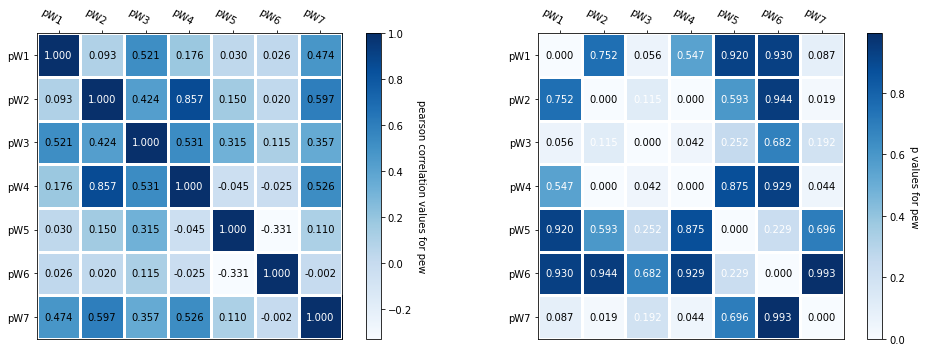

In [23]:
plot_heat_map(carray_pew_bl, parray_pew_bl, 'pew')

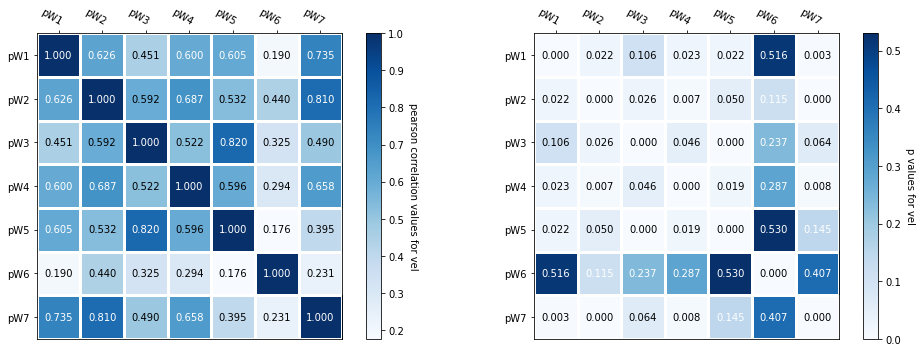

In [24]:
plot_heat_map(carray_vel_bl, parray_vel_bl, 'vel')